In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [8]:
#load csv file into data frame
data = pd.read_csv('healthcare.csv')
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [9]:
data.shape #it shows rows and columns

(106987, 15)

In [10]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [12]:
data.describe() #IT will show numeric data 

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [13]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [14]:
data.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41
106986,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [15]:
data.drop_duplicates()#removes the duplicates 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [16]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  float64       
 1   AppointmentID   106987 non-null  int64         
 2   Gender          106987 non-null  object        
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  object        
 7   Scholarship     106987 non-null  bool          
 8   Hipertension    106987 non-null  bool          
 9   Diabetes        106987 non-null  bool          
 10  Alcoholism      106987 non-null  bool          
 11  Handcap         106987 non-null  bool          
 12  SMS_received    106987 non-null  bool          
 13  Showed_up       106987 non-null  bool          
 14  Date.diff       106987 non-null  int

In [18]:
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


In [19]:
data['Gender']=data['Gender'].map({'M':0,'F':1})
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,1,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,1,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,1,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,1,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [20]:
data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace=True)
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,1,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,1,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,1,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,1,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,1,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,1,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,1,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [21]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [22]:
#drop unnecessary ID columns
data.drop(columns=['PatientId','AppointmentID','Neighbourhood'],inplace=True)
data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff
0,1,2016-04-29,2016-04-29,62,False,True,False,False,False,False,True,0
1,0,2016-04-29,2016-04-29,56,False,False,False,False,False,False,True,0
2,1,2016-04-29,2016-04-29,62,False,False,False,False,False,False,True,0
3,1,2016-04-29,2016-04-29,8,False,False,False,False,False,False,True,0
4,1,2016-04-29,2016-04-29,56,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106982,1,2016-05-03,2016-06-07,56,False,False,False,False,False,True,True,35
106983,1,2016-05-03,2016-06-07,51,False,False,False,False,False,True,True,35
106984,1,2016-04-27,2016-06-07,21,False,False,False,False,False,True,True,41
106985,1,2016-04-27,2016-06-07,38,False,False,False,False,False,True,True,41


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          106987 non-null  int64         
 1   ScheduledDay    106987 non-null  datetime64[ns]
 2   AppointmentDay  106987 non-null  datetime64[ns]
 3   Age             106987 non-null  int64         
 4   Scholarship     106987 non-null  bool          
 5   Hypertension    106987 non-null  bool          
 6   Diabetes        106987 non-null  bool          
 7   Alcoholism      106987 non-null  bool          
 8   Handicap        106987 non-null  bool          
 9   SMS_received    106987 non-null  bool          
 10  Showed_up       106987 non-null  bool          
 11  Date.diff       106987 non-null  int64         
dtypes: bool(7), datetime64[ns](2), int64(3)
memory usage: 4.8 MB


In [24]:
data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'Showed_up', 'Date.diff'],
      dtype='object')

In [25]:
#create table for miss values and missing values in percent%
missing_values=data.isnull().sum() #missing values
percent_missing=data.isnull().sum()/data.shape[0]*100 #missing_values in percentage %
value={
    'missing_values':missing_values,
    'percent_missing %':percent_missing}
frame=pd.DataFrame(value)#dataframe will display rows and columns/table format
frame

,missing_values,percent_missing %
Gender,0,0.0
ScheduledDay,0,0.0
AppointmentDay,0,0.0
Age,0,0.0
Scholarship,0,0.0
Hypertension,0,0.0
Diabetes,0,0.0
Alcoholism,0,0.0
Handicap,0,0.0
SMS_received,0,0.0


C:\Users\adnaa\AppData\Local\Temp\ipykernel_39912\3837706743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=data, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

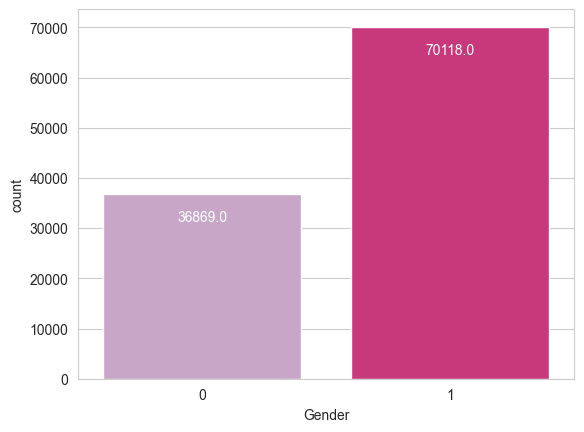

In [26]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Gender', data=data, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\adnaa\AppData\Local\Temp\ipykernel_39912\576042675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Hypertension', data=data, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

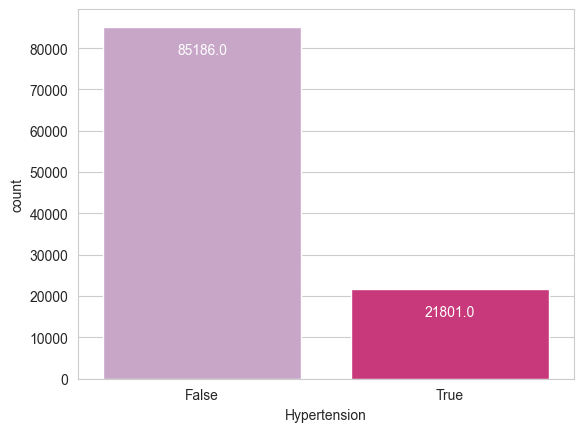

In [27]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Hypertension', data=data, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\adnaa\AppData\Local\Temp\ipykernel_39912\2475245544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diabetes', data=data, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

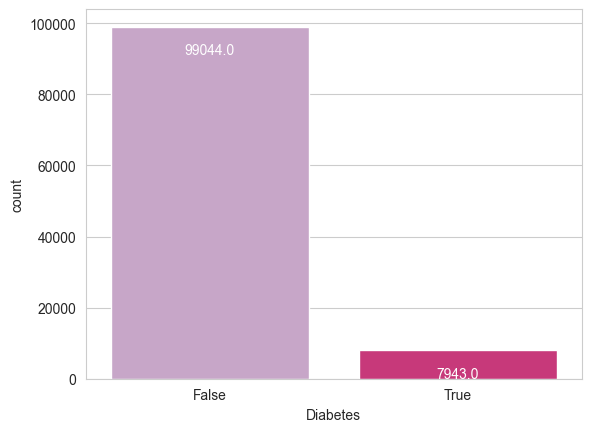

In [28]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Diabetes', data=data, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\adnaa\AppData\Local\Temp\ipykernel_39912\3925753290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Handicap', data=data, palette="PuRd")


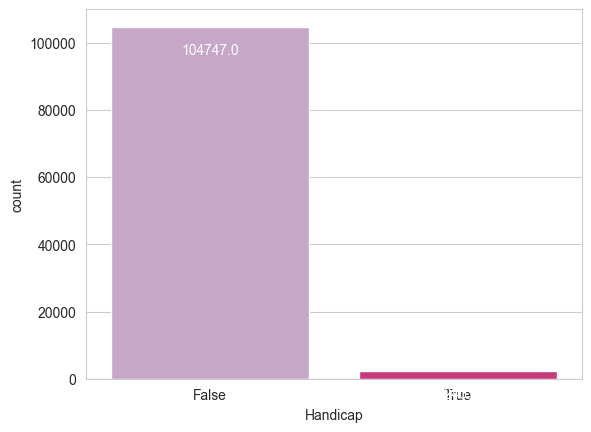

In [29]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Handicap', data=data, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='top', color='white', size=10)
plt.show()

C:\Users\adnaa\AppData\Local\Temp\ipykernel_39912\1226047126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Alcoholism', data=data, palette="BuGn")


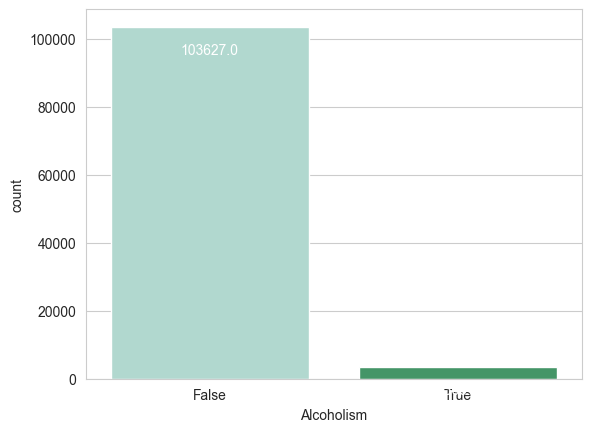

In [30]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Alcoholism', data=data, palette="BuGn")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='top', color='white', size=10)
plt.show()

C:\Users\adnaa\AppData\Local\Temp\ipykernel_39912\1220659846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Showed_up',data=data, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

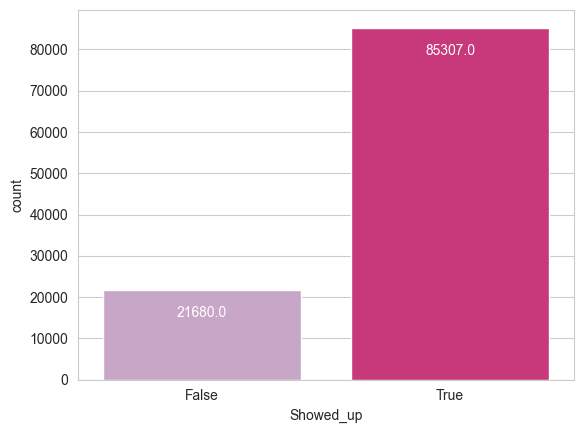

In [31]:
import seaborn as sns
sns.set_style("whitegrid")

ax=sns.countplot(x='Showed_up',data=data, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\adnaa\AppData\Local\Temp\ipykernel_39912\383118451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Scholarship', data=data, palette="PuRd")


<function matplotlib.pyplot.show(close=None, block=None)>

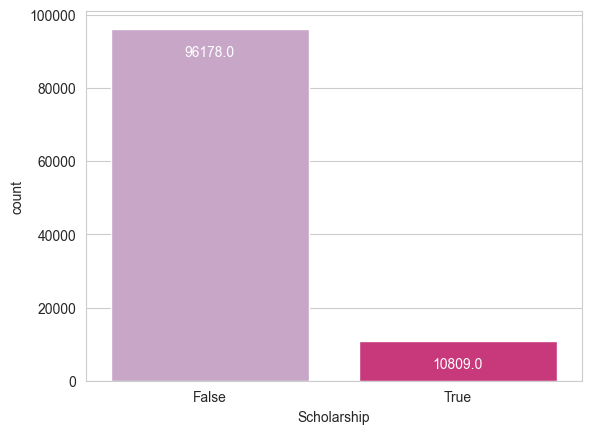

In [32]:
sns.set_style("whitegrid")

ax = sns.countplot(x='Scholarship', data=data, palette="PuRd")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='top', color='white', size=10)
plt.show

C:\Users\adnaa\AppData\Local\Temp\ipykernel_39912\1542934904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='SMS_received', data=data, palette="RdBu")


<function matplotlib.pyplot.show(close=None, block=None)>

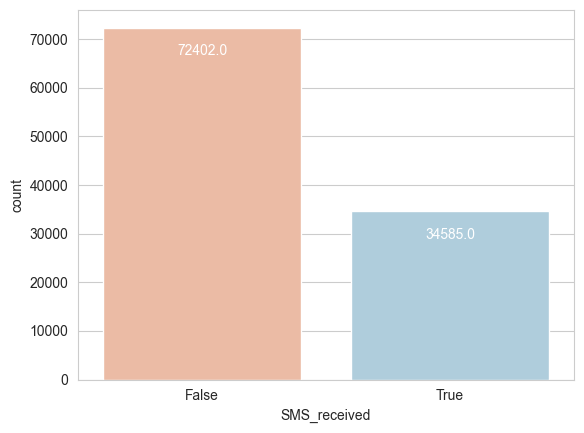

In [33]:
sns.set_style("whitegrid")

ax = sns.countplot(x='SMS_received', data=data, palette="RdBu")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='top', color='white', size=10)
plt.show

Text(0.5, 1.0, 'Patient Show-Up Status')

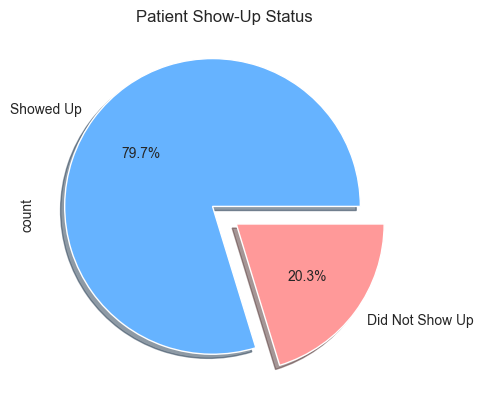

In [34]:
data["Showed_up"].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Move both segments outward slightly
    autopct='%1.1f%%',              # Display percentage with 1 decimal place
    shadow=True,                    # Add a shadow for a 3D effect
    colors=["#66b3ff", "#ff9999"],  # Custom colors for visual appeal
    labels=['Showed Up', 'Did Not Show Up']  # Descriptive labels for the pie chart
)
 
plt.title('Patient Show-Up Status')

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'ScheduledDay'}>],
       [<Axes: title={'center': 'AppointmentDay'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Date.diff'}>, <Axes: >]], dtype=object)

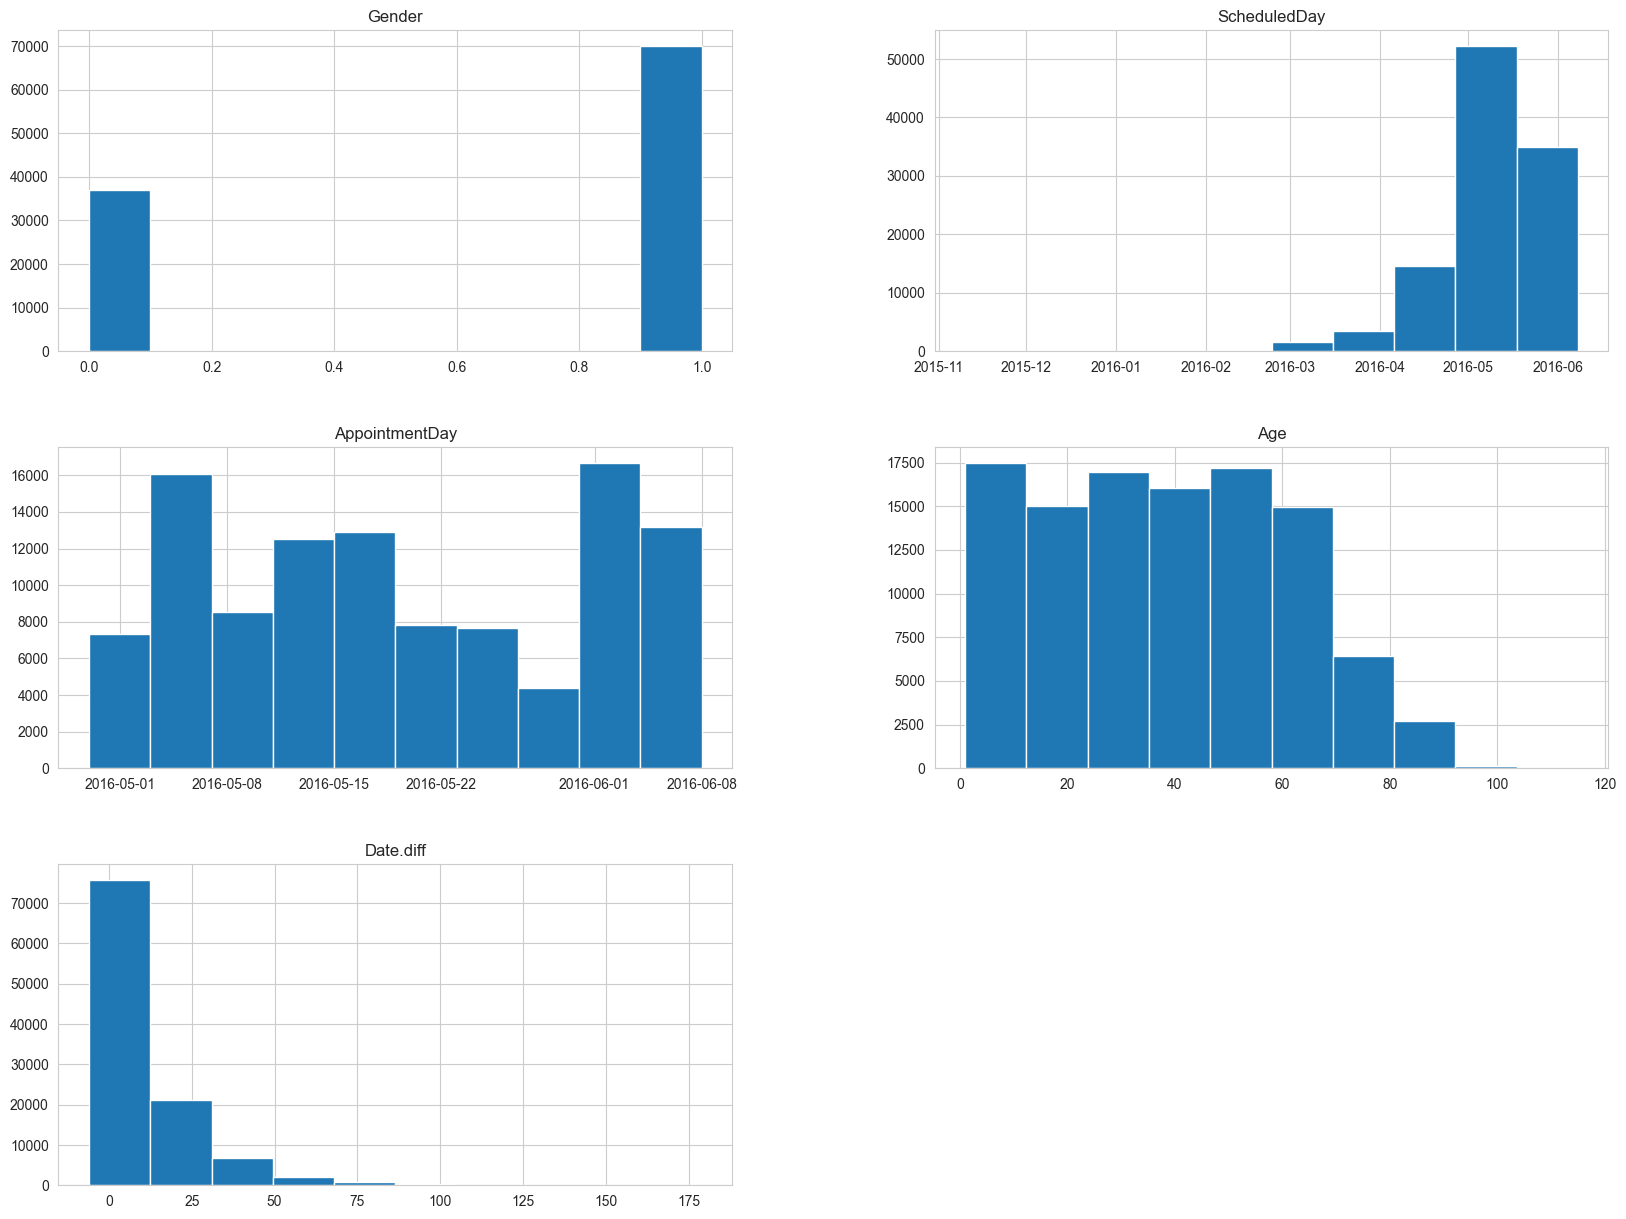

In [35]:
data.hist(figsize=(20,15))

SMS_received
False    72402
True     34585
Name: count, dtype: int64


<Axes: xlabel='SMS_received', ylabel='count'>

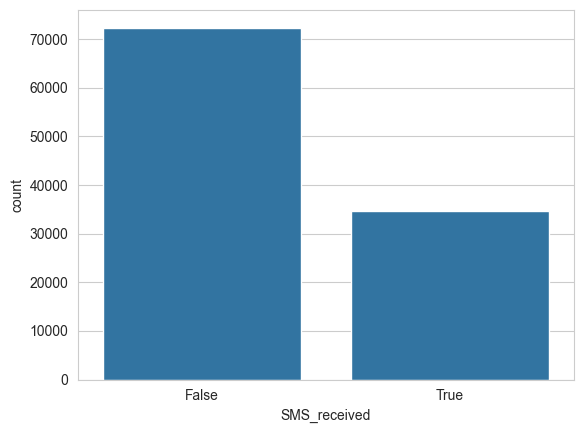

In [36]:
print(data['SMS_received'].value_counts())
sns.countplot(x='SMS_received',data=data)

In [37]:
data['ScheduledDay_DayofWeek']=data['ScheduledDay'].dt.dayofweek
data['AppointmentDay_Dayofweek']=data['AppointmentDay'].dt.dayofweek
data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek,AppointmentDay_Dayofweek
0,1,2016-04-29,2016-04-29,62,False,True,False,False,False,False,True,0,4,4
1,0,2016-04-29,2016-04-29,56,False,False,False,False,False,False,True,0,4,4
2,1,2016-04-29,2016-04-29,62,False,False,False,False,False,False,True,0,4,4
3,1,2016-04-29,2016-04-29,8,False,False,False,False,False,False,True,0,4,4
4,1,2016-04-29,2016-04-29,56,False,True,True,False,False,False,True,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,1,2016-05-03,2016-06-07,56,False,False,False,False,False,True,True,35,1,1
106983,1,2016-05-03,2016-06-07,51,False,False,False,False,False,True,True,35,1,1
106984,1,2016-04-27,2016-06-07,21,False,False,False,False,False,True,True,41,2,1
106985,1,2016-04-27,2016-06-07,38,False,False,False,False,False,True,True,41,2,1


In [38]:
data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'Showed_up', 'Date.diff', 'ScheduledDay_DayofWeek',
       'AppointmentDay_Dayofweek'],
      dtype='object')

In [39]:
data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek,AppointmentDay_Dayofweek
0,1,2016-04-29,2016-04-29,62,False,True,False,False,False,False,True,0,4,4
1,0,2016-04-29,2016-04-29,56,False,False,False,False,False,False,True,0,4,4
2,1,2016-04-29,2016-04-29,62,False,False,False,False,False,False,True,0,4,4
3,1,2016-04-29,2016-04-29,8,False,False,False,False,False,False,True,0,4,4
4,1,2016-04-29,2016-04-29,56,False,True,True,False,False,False,True,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,1,2016-05-03,2016-06-07,56,False,False,False,False,False,True,True,35,1,1
106983,1,2016-05-03,2016-06-07,51,False,False,False,False,False,True,True,35,1,1
106984,1,2016-04-27,2016-06-07,21,False,False,False,False,False,True,True,41,2,1
106985,1,2016-04-27,2016-06-07,38,False,False,False,False,False,True,True,41,2,1


In [40]:
e=LabelEncoder()
 
data['Scholarship']=e.fit_transform(data['Scholarship'])
data['Hypertension']=e.fit_transform(data['Hypertension'])
data['Diabetes']=e.fit_transform(data['Diabetes'])
data['Alcoholism']=e.fit_transform(data['Alcoholism'])
data['Handicap']=e.fit_transform(data['Handicap'])
data['SMS_received']=e.fit_transform(data['SMS_received'])
data['Showed_up']=e.fit_transform(data['Showed_up'])
data['Date.diff']=e.fit_transform(data['Date.diff'])
data['ScheduledDay_DayofWeek']=e.fit_transform(data['ScheduledDay_DayofWeek'])
data['AppointmentDay_Dayofweek']=e.fit_transform(data['AppointmentDay_Dayofweek'])

In [41]:
data.corr()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed_up,Date.diff,ScheduledDay_DayofWeek,AppointmentDay_Dayofweek
Gender,1.000000,-0.020120,0.006587,0.094108,0.113679,0.051312,0.030027,-0.110410,-0.024599,0.045852,-0.003238,0.030766,-0.006547,-0.004179
ScheduledDay,-0.020120,1.000000,0.604808,-0.024109,0.023316,0.012334,0.022470,0.032760,0.014480,-0.255584,0.161646,-0.770025,-0.044288,-0.064520
AppointmentDay,0.006587,0.604808,1.000000,0.010805,-0.001483,-0.001904,0.001069,0.002698,-0.003673,0.094904,0.021425,0.039672,-0.052977,-0.117855
Age,0.094108,-0.024109,0.010805,1.000000,-0.112699,0.502091,0.290631,0.090391,0.079726,0.005251,0.067025,0.037580,0.007503,0.000548
Scholarship,0.113679,0.023316,-0.001483,-0.112699,1.000000,-0.024530,-0.027622,0.033527,-0.010465,-0.000010,-0.029370,-0.030773,-0.005582,-0.000780
Hypertension,0.051312,0.012334,-0.001904,0.502091,-0.024530,1.000000,0.430827,0.085459,0.082909,-0.008805,0.037280,-0.019822,-0.000669,0.002716
Diabetes,0.030027,0.022470,0.001069,0.290631,-0.027622,0.430827,1.000000,0.016874,0.057945,-0.016136,0.015928,-0.028478,-0.001156,0.006279
Alcoholism,-0.110410,0.032760,0.002698,0.090391,0.033527,0.085459,0.016874,1.000000,0.002864,-0.027403,0.000517,-0.039343,0.006256,0.002459
Handicap,-0.024599,0.014480,-0.003673,0.079726,-0.010465,0.082909,0.057945,0.002864,1.000000,-0.026256,0.007620,-0.021813,0.000723,0.004409
SMS_received,0.045852,-0.255584,0.094904,0.005251,-0.000010,-0.008805,-0.016136,-0.027403,-0.026256,1.000000,-0.127253,0.401585,0.078614,-0.092621


<Axes: >

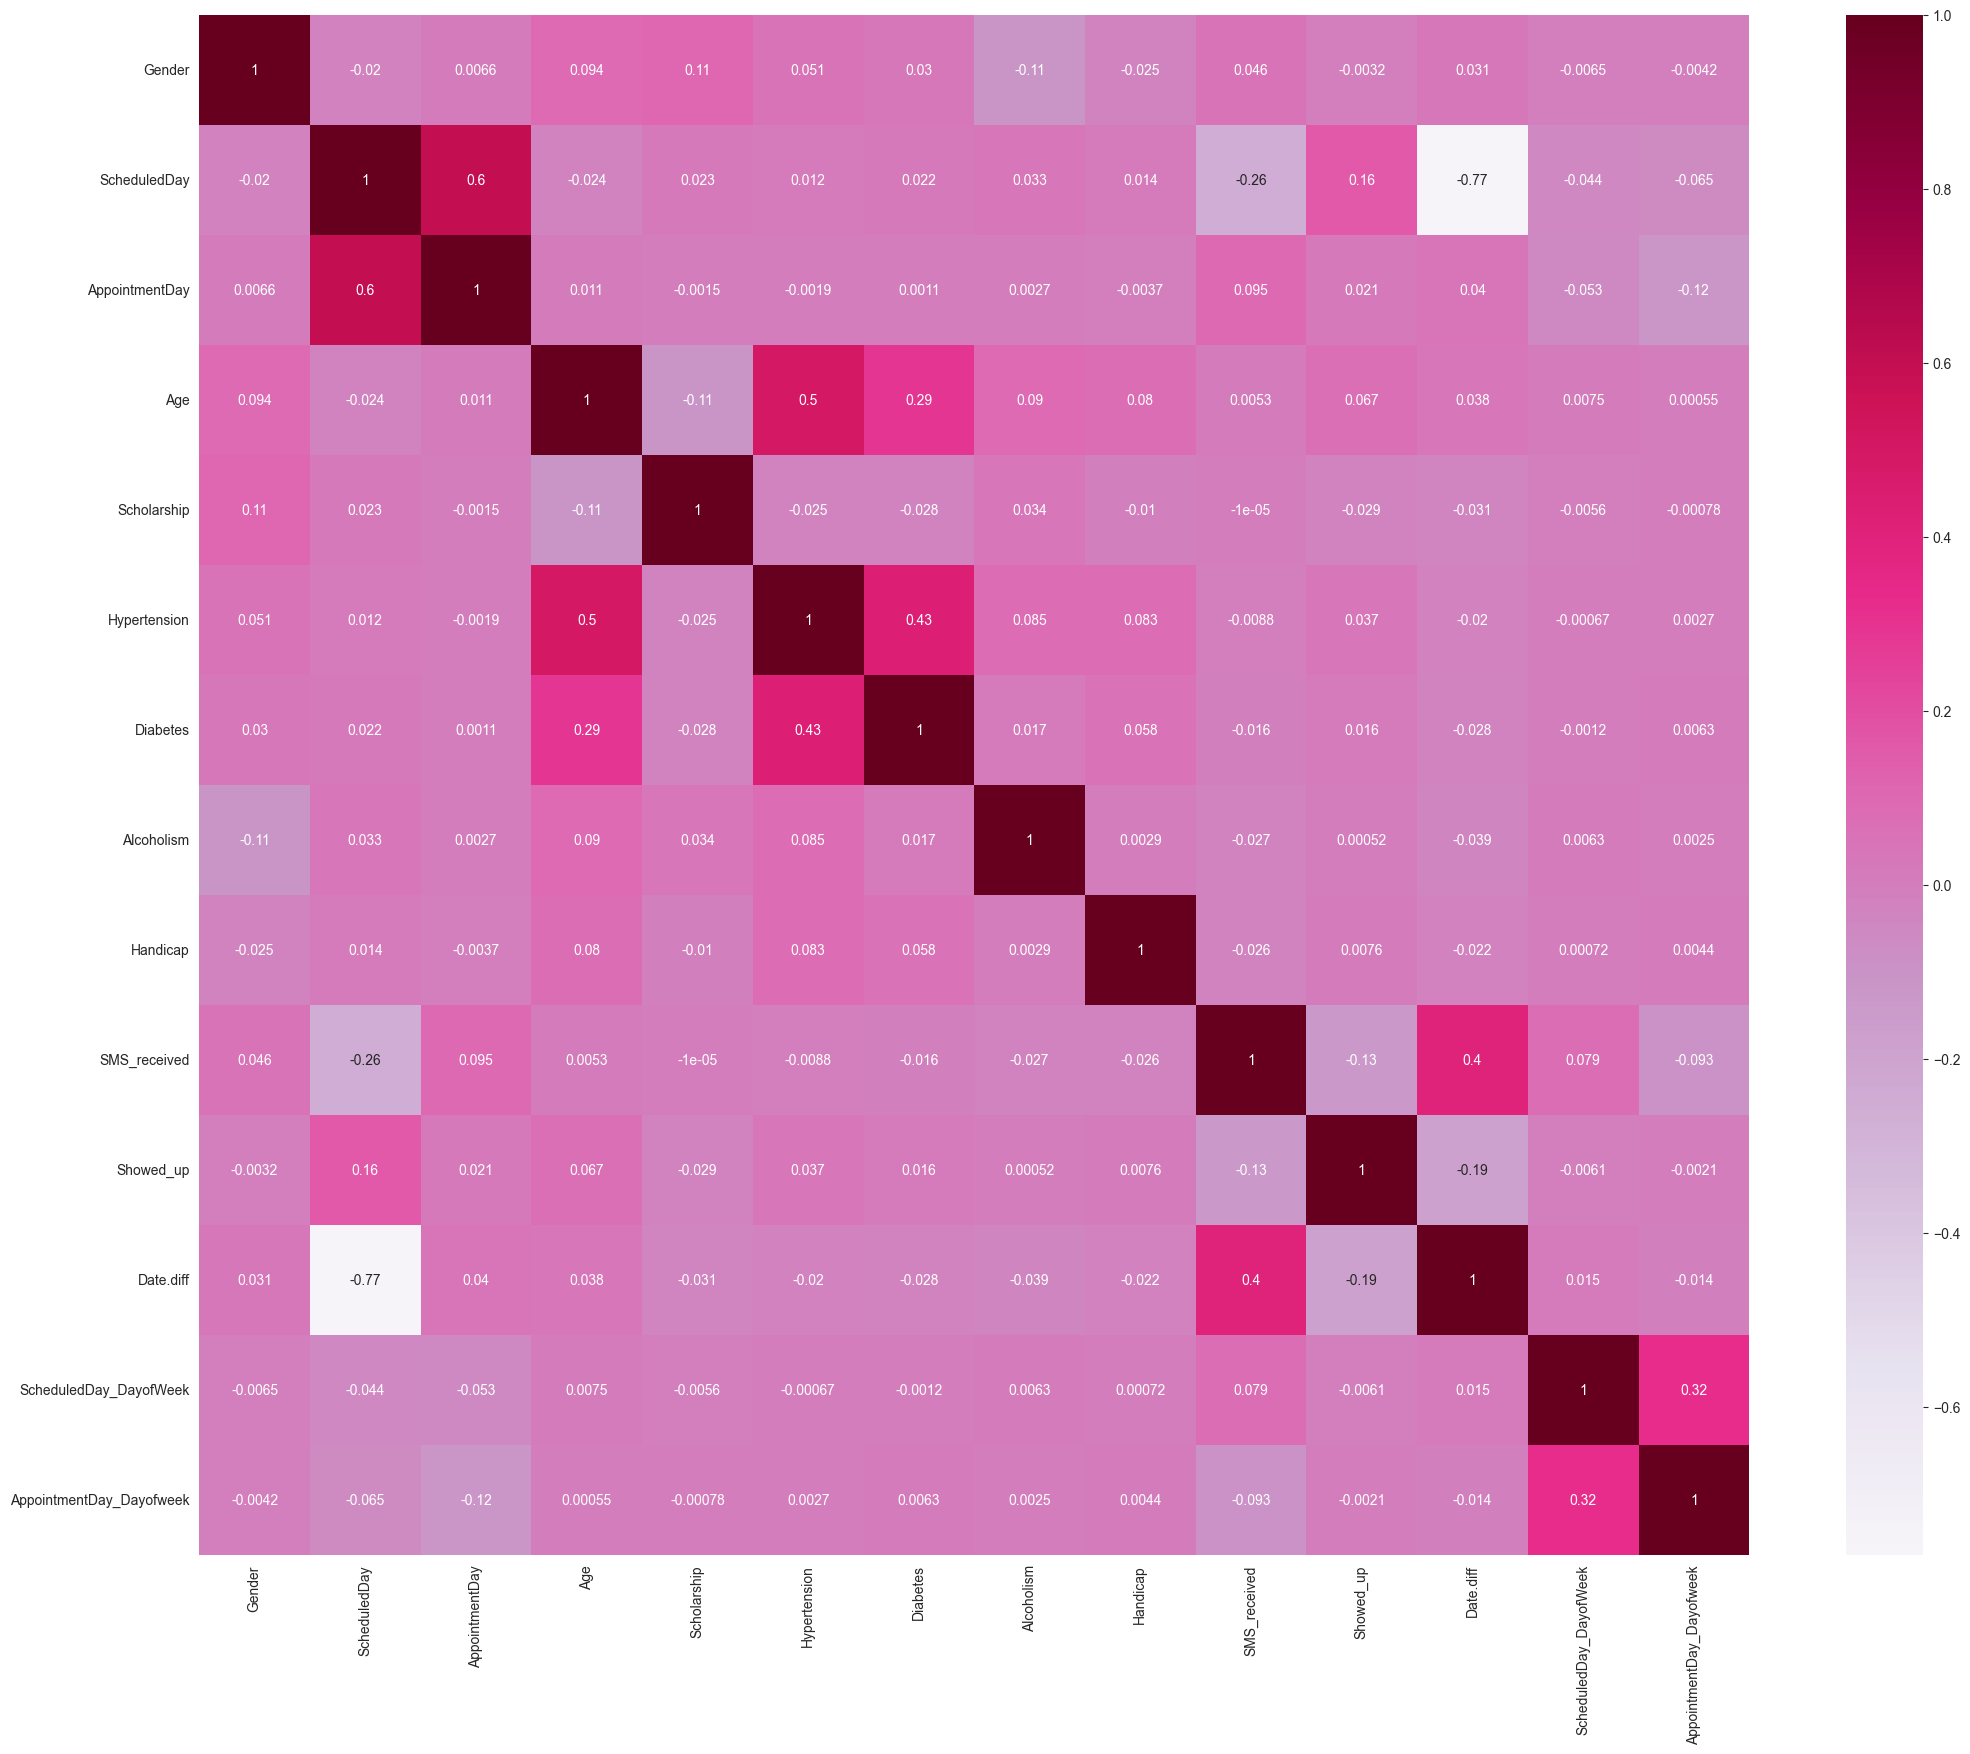

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True,cmap="PuRd")

<Axes: >

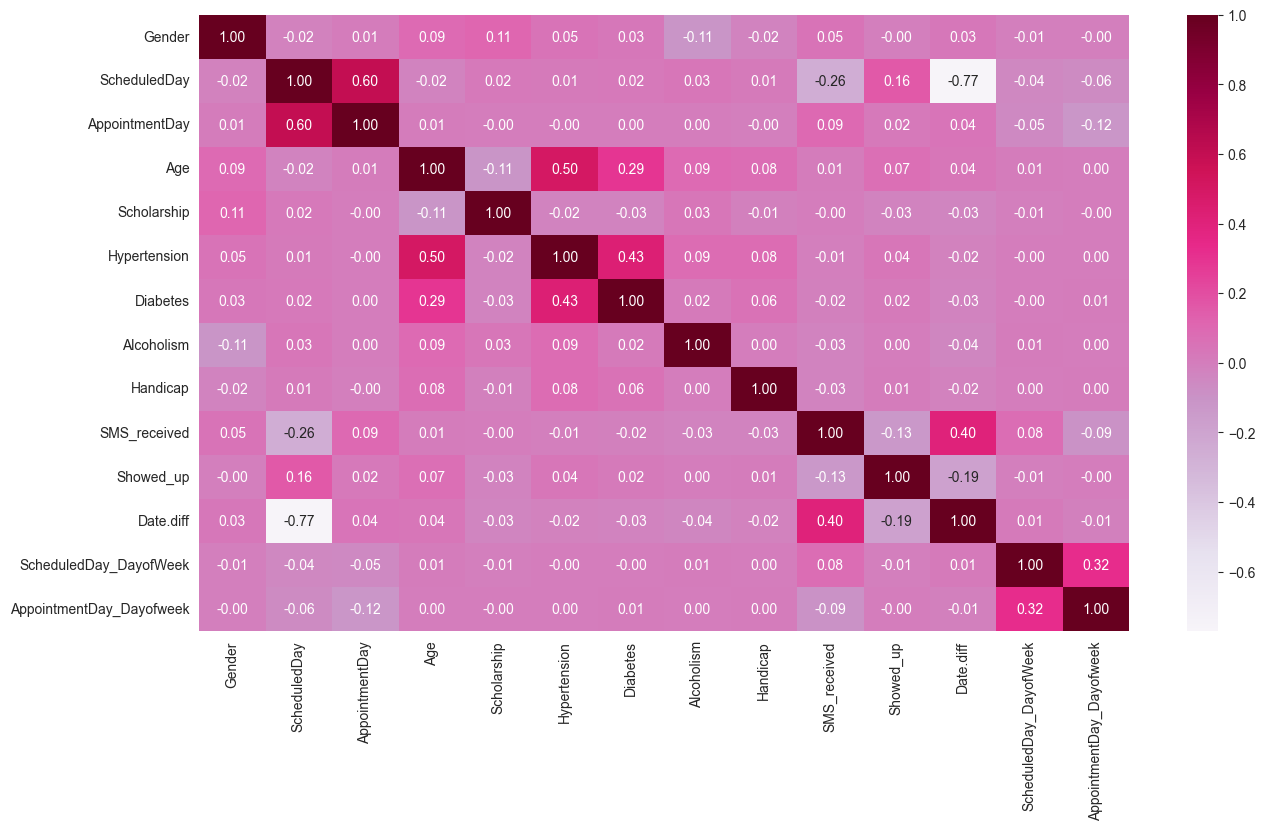

In [43]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap="PuRd")

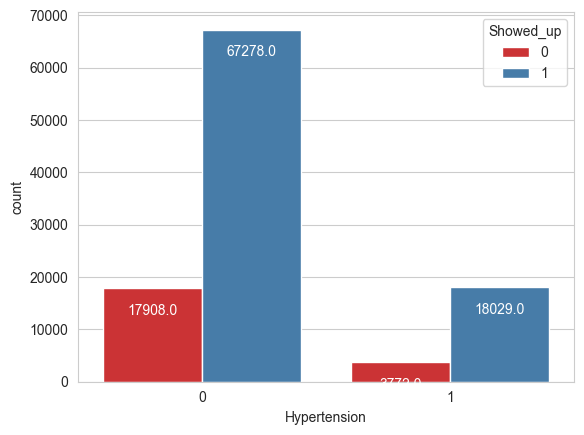

In [44]:
ax = sns.countplot(x='Hypertension',hue='Showed_up',data=data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

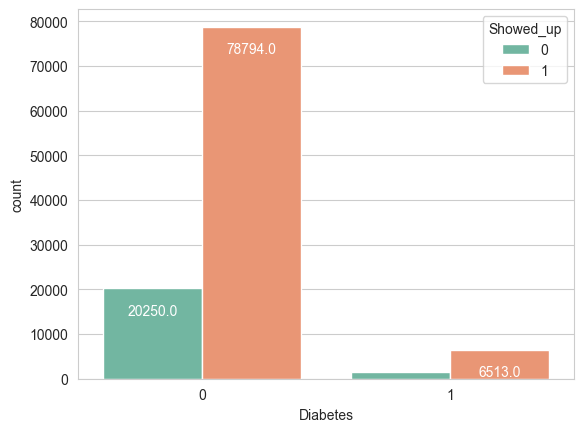

In [45]:
ax = sns.countplot(x='Diabetes',hue='Showed_up',data=data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

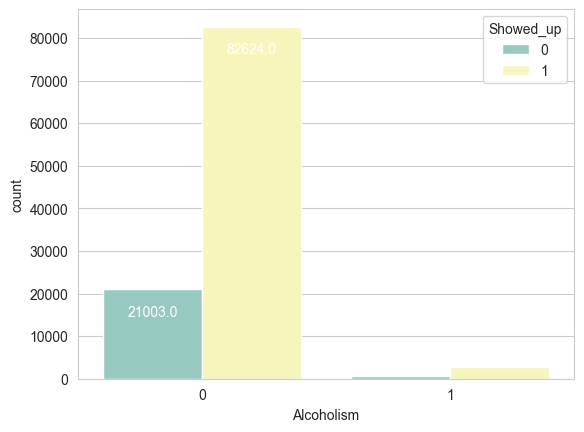

In [46]:
ax = sns.countplot(x='Alcoholism',hue='Showed_up',data=data, palette="Set3")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

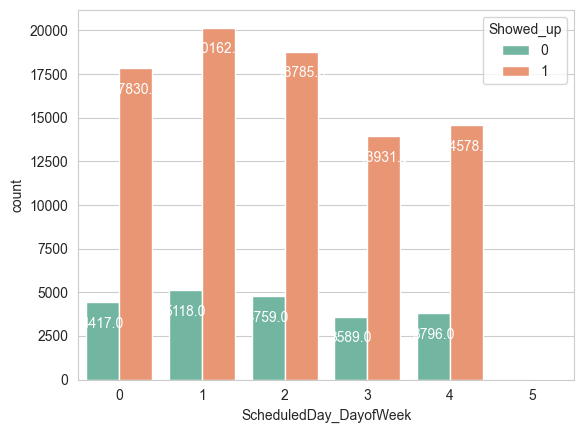

In [47]:
ax = sns.countplot(x='ScheduledDay_DayofWeek',hue='Showed_up',data=data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

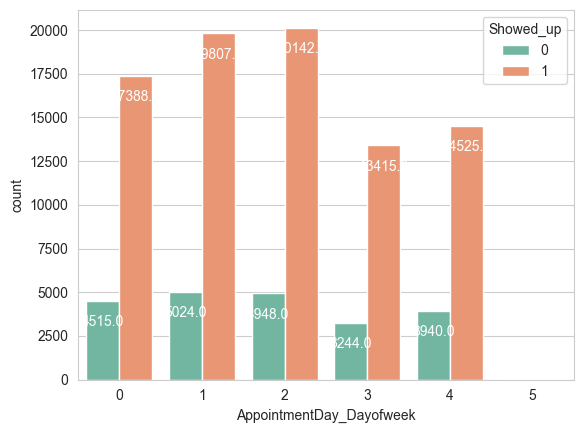

In [48]:
ax = sns.countplot(x='AppointmentDay_Dayofweek',hue='Showed_up',data=data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

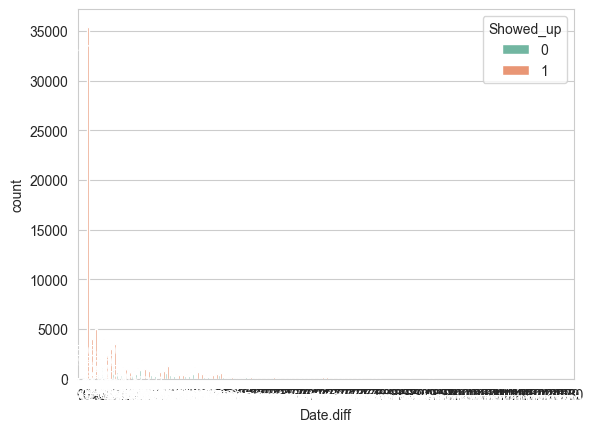

In [49]:
ax = sns.countplot(x='Date.diff',hue='Showed_up',data=data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

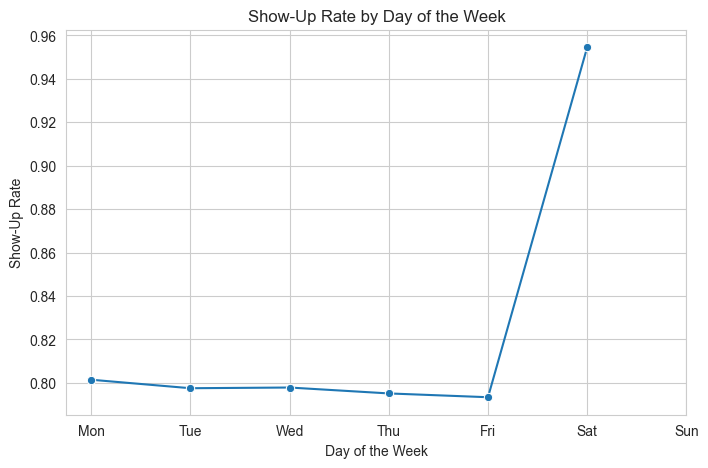

In [50]:
show_rate_by_day = data.groupby('ScheduledDay_DayofWeek')['Showed_up'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=show_rate_by_day.index, y=show_rate_by_day.values, marker='o')
plt.title("Show-Up Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Show-Up Rate")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

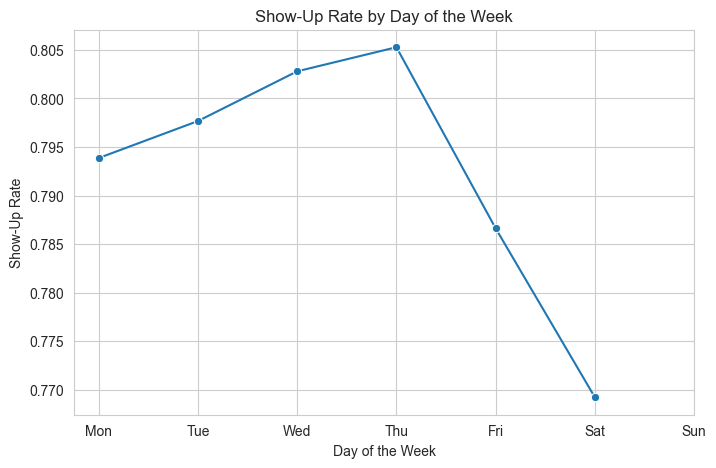

In [51]:
show_rate_by_day = data.groupby('AppointmentDay_Dayofweek')['Showed_up'].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=show_rate_by_day.index, y=show_rate_by_day.values, marker='o')
plt.title("Show-Up Rate by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Show-Up Rate")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [52]:
data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'Showed_up', 'Date.diff', 'ScheduledDay_DayofWeek',
       'AppointmentDay_Dayofweek'],
      dtype='object')

In [53]:
x=data.drop(['Showed_up','ScheduledDay','AppointmentDay', 'Date.diff','ScheduledDay_DayofWeek',
       'AppointmentDay_Dayofweek'], axis=1)
y=data['Showed_up']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [54]:
x.columns

Index(['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received'],
      dtype='object')

In [55]:
x

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,1,62,0,1,0,0,0,0
1,0,56,0,0,0,0,0,0
2,1,62,0,0,0,0,0,0
3,1,8,0,0,0,0,0,0
4,1,56,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
106982,1,56,0,0,0,0,0,1
106983,1,51,0,0,0,0,0,1
106984,1,21,0,0,0,0,0,1
106985,1,38,0,0,0,0,0,1


In [56]:
x.columns

Index(['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received'],
      dtype='object')

In [57]:
accuracies = {}
algo_time={}
roc_auc_scores={}

In [58]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

LOGISTIC REGRESSION
ROC_AUC value : 50.0 % 


Accuracy Score : 79.69482059610465 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

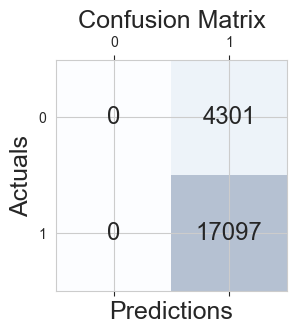

In [59]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
#acc = lr.score(x_train, y_train)*100
#accuracies['LOGISTIC REGRESSION'] = acc
algo_time['LOGISTIC REGRESSION']=end-start

In [60]:
import numpy as np
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [61]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': np.int64(49)}
The best score we have achieved is: 0.7963289751776266


K-NEAREST NEIGHBOURS
ROC_AUC value : 50.23682518760626 % 


Accuracy Score : 79.60368738973467 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.33      0.01      0.02      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.57      0.50      0.45     21398
weighted avg       0.71      0.80      0.71     21398



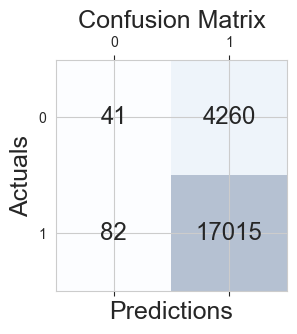

In [62]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')
#acc = knn_cv.score(x_train, y_train)*100
#accuracies['K-NEAREST NEIGHBOURS'] = acc

In [63]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

In [64]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(CV_rfc.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(CV_rfc.best_score_*100))

The best paramter we have is: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
The best score we have achieved is: 79.69482063962269


RANDOM FOREST TREE
ROC_AUC value : 50.0 % 


Accuracy Score : 79.69482059610465 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

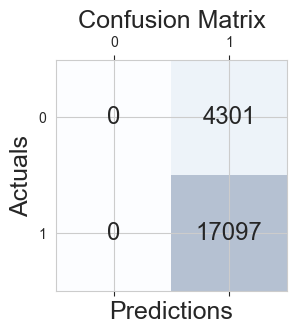

In [65]:
print("RANDOM FOREST TREE")
print_performance2(y_test,CV_rfc,'RANDOM FOREST TREE')
#acc = CV_rfc.score(x_train, y_train)*100
#accuracies['RANDOM FOREST TREE'] = acc

In [66]:
%pip install plotly.x

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement plotly.x (from versions: none)
ERROR: No matching distribution found for plotly.x

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
%pip install nbformat
%pip install plotly==5.22.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import plotly.express as px
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Accuracy Comparision", xaxis_title="Model", yaxis_title="Accuracy")
fig.show()

In [69]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="Algorithm Time Comparision", xaxis_title="Model", yaxis_title="")
fig.show()

In [70]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
fig.update_traces(marker_color='teal', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title="ROC Score Comparision", xaxis_title="Model", yaxis_title="ROC Scores")
fig.show()

In [71]:
import plotly.graph_objects as go
Algos=list(roc_auc_scores.keys())

fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='ROC Auc Scores', x=Algos, y=list(roc_auc_scores.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

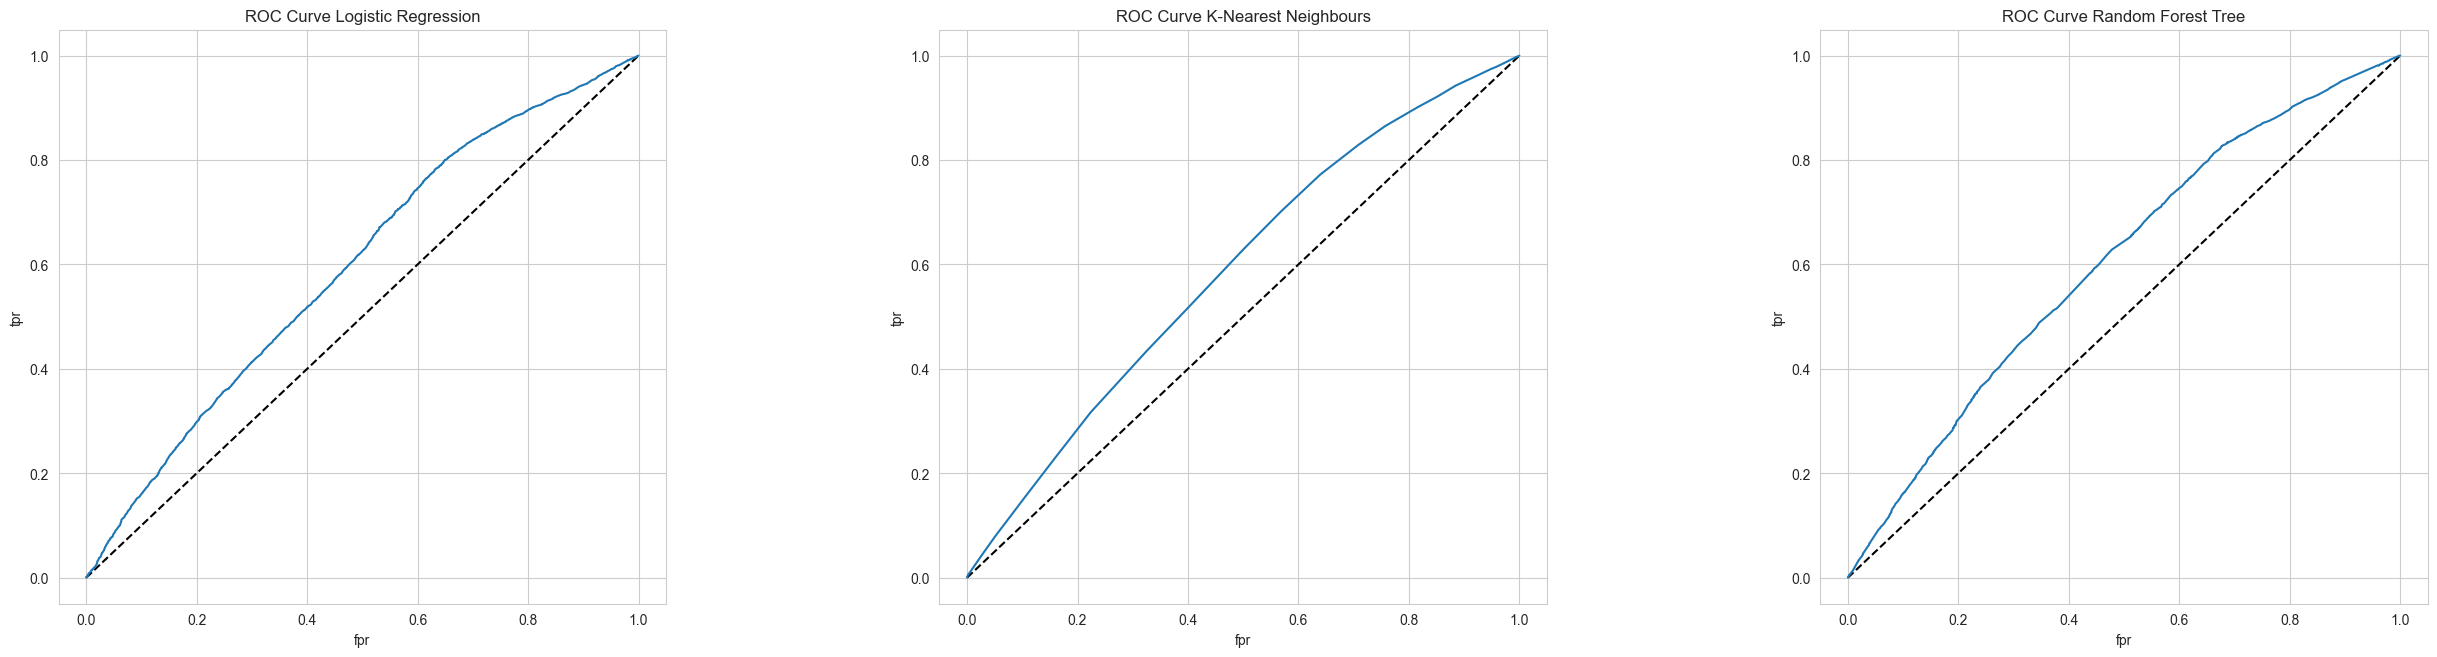

In [72]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(25,16))
# Logistic Regression Classification
Y_predict1_proba = lr.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(441)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

Y_predict1_proba = knn_cv.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(442)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve K-Nearest Neighbours')
plt.grid(True)

Y_predict1_proba = CV_rfc.predict_proba(x_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(443)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest Tree')
plt.grid(True)

plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

In [73]:
x.columns

Index(['Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received'],
      dtype='object')

In [74]:
print("NOT SHOWED UP BASED ON ML ALGORITHMS")
print("Enter 1 for yes and 0for no")
Gender =int(input("Is the pateint male?"))
Age=int(input("Is the patient senior citizen ?"))
Scholarship=int(input("Does the patient have hyper tension"))
Hypertension=int(input("Does the patient have diabetes ?"))
Diabetes=int(input("Does the patient have Diabetes ?"))
Alcoholism = int(input("Does the patient drink alcohol ?"))
Handicapped = int(input("Is the patient handicapped ?"))
SMS_received = int(input("Did the patient receive SMS ?"))

 
patient = [[Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,]]
result = knn_cv.predict(patient)
print("\nResults : ",result)
 
if result == 1:
    print('The Patient has not showed up for the appointment.')
    print()
else :
    print('The Patient has showed up for the appointment.')
    print()

NOT SHOWED UP BASED ON ML ALGORITHMS
Enter 1 for yes and 0for no

Results :  [1]
The Patient has not showed up for the appointment.



c:\Users\adnaa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [75]:
import joblib
#Save as a pickle file
filename='final_model.pkl'
joblib.dump(knn,open(filename,'wb'))

In [76]:
pip install -requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'equirements.txt'

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
